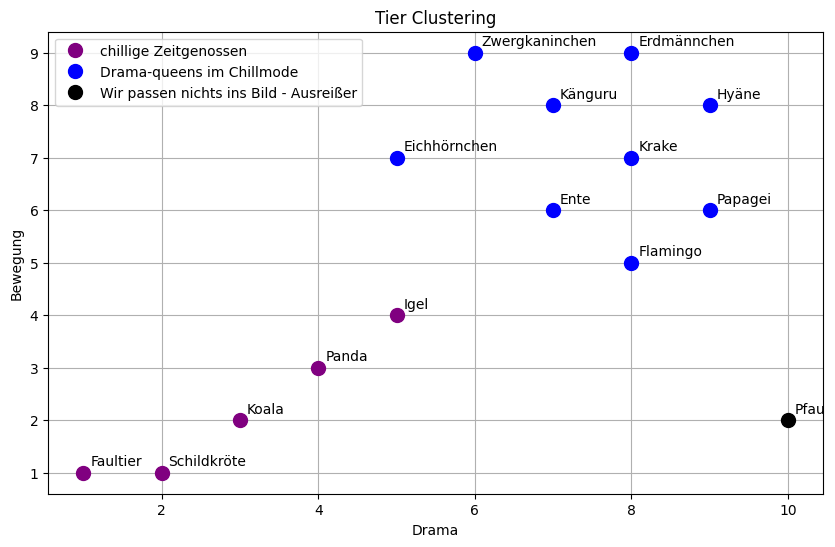

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

tiere = {
    "Tier": ["Pfau", "Faultier", "Zwergkaninchen", "Koala", "Krake", "Igel", "Ente", "Panda", "Hyäne", "Erdmännchen",
             "Känguru", "Schildkröte", "Papagei", "Eichhörnchen", "Flamingo"],
    "Drama": [10, 1, 6, 3, 8, 5, 7, 4, 9, 8, 7, 2, 9, 5, 8],
    "Bewegung": [2, 1, 9, 2, 7, 4, 6, 3, 8, 9, 8, 1, 6, 7, 5]
}

# Create a Pandas DataFrame
df = pd.DataFrame(tiere)

# Select the features for clustering
X = df[["Drama", "Bewegung"]].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=3)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
unique_labels = set(clusters)

# Assign specific colors and labels to clusters
colors = {}
labels = {}
for k in unique_labels:
    if k == -1:
      colors[k] = [0, 0, 0, 1]
      labels[k] = 'Wir passen nicht ins Bild - Ausreißer'
    elif k == 0:
      colors[k] = 'purple'
      labels[k] = 'Chillige Zeitgenossen'
    elif k == 1:
      colors[k] = 'blue'
      labels[k] = 'Drama-Queens im Chillmode'
    else:
        #Assign Default colors for other clusters
        colors[k] = plt.cm.Spectral(k/len(unique_labels))
        labels[k] = f'Cluster {k}'

for k in unique_labels:
    class_member_mask = (clusters == k)
    xy = X[class_member_mask]
    names = df['Tier'][class_member_mask].values

    plt.plot(xy[:, 0], xy[:, 1], 'o', color=colors[k],
             markersize=10, label=labels.get(k,f'Cluster {k}'))
    for i, txt in enumerate(names):
        plt.annotate(txt, (xy[i, 0], xy[i, 1]), textcoords="offset points", xytext=(5,5), ha='left')


plt.title('Tier-Clustering')
plt.xlabel('Drama')
plt.ylabel('Bewegung')
plt.legend()
plt.grid(True)
plt.show()

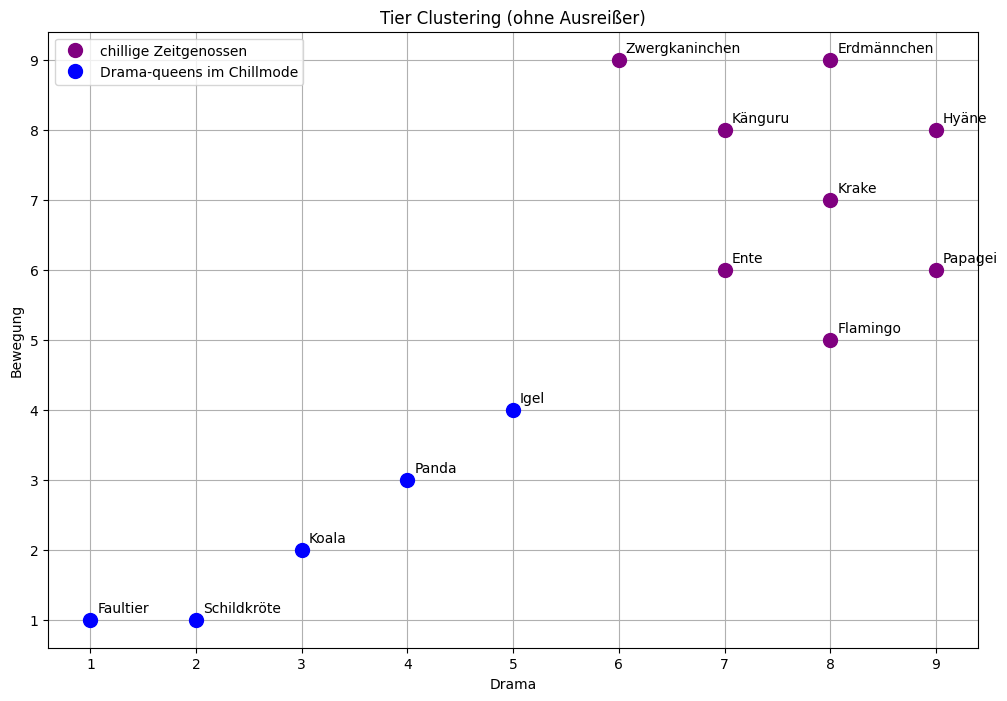

In [ ]:
#Entfernen der Ausreißer
tiere = {
    "Tier": ["Pfau", "Faultier", "Zwergkaninchen", "Koala", "Krake", "Igel", "Ente", "Panda", "Hyäne", "Erdmännchen",
             "Känguru", "Schildkröte", "Papagei", "Eichhörnchen", "Flamingo"],
    "Drama": [10, 1, 6, 3, 8, 5, 7, 4, 9, 8, 7, 2, 9, 5, 8],
    "Bewegung": [2, 1, 9, 2, 7, 4, 6, 3, 8, 9, 8, 1, 6, 7, 5]
}

# Create a Pandas DataFrame
df = pd.DataFrame(tiere)

# Select the features for clustering
X = df[["Drama", "Bewegung"]].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=3)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Remove outliers
df_no_outliers = df[df['Cluster'] != -1]

# Select the features for plotting without outliers
X_no_outliers = df_no_outliers[["Drama", "Bewegung"]].values
clusters_no_outliers = df_no_outliers['Cluster'].values

# Plotting the clusters without outliers
plt.figure(figsize=(12, 8))
unique_labels = set(clusters_no_outliers)

# Assign specific colors and labels to clusters
colors = {}
labels = {}
for k in unique_labels:
    if k == 0:
      colors[k] = 'purple' # Purple for cluster 0
      labels[k] = 'Chillige Zeitgenossen'
    elif k == 1:
      colors[k] = 'blue' # blue for cluster 1
      labels[k] = 'Drama-Queens im Chillmode'
    else:
        #Assign Default colors for other clusters
        colors[k] = plt.cm.Spectral(k/len(unique_labels))
        labels[k] = f'Cluster {k}'


for k in unique_labels:
    class_member_mask = (clusters_no_outliers == k)
    xy = X_no_outliers[class_member_mask]
    names = df_no_outliers['Tier'][class_member_mask].values

    plt.plot(xy[:, 0], xy[:, 1], 'o', color=colors[k],
             markersize=10, label=labels.get(k,f'Cluster {k}'))
    for i, txt in enumerate(names):
        plt.annotate(txt, (xy[i, 0], xy[i, 1]), textcoords="offset points", xytext=(5,5), ha='left')


plt.title('Tier-Clustering (ohne Ausreißer)')
plt.xlabel('Drama')
plt.ylabel('Bewegung')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
outliers = df[df['Cluster'] == -1]['Tier'].values
print("Ausreißer:")
for outlier in outliers:
    print(f"- {outlier}")

Ausreißer:
- Pfau
- Eichhörnchen
